# Explratory Data Analysis Using Python - A Case Study

# Introduction

We'll use the StackOverflow devloper survey dataset for our analysis. This is an annual survey conducted by StackOverflow
and you can find the raw data and results here: https://insights.stackoverflow.com/survey

The objective of this analysis is to find out the demographics of the survey respondents like countries from where the number of responses are high, the distribution of age of the respondents, their education level and employment level. We'll also try to answer important questions like which were the most popular programming languages, which languages is the most people interested to learn over next year, is having a computer science degree necessary to start a career in programming etc.

I have downloaded the files manually and added the csv files to Jupyter lab's GUI. The dataset contains three files:

1. README.txt - containig information about dataset.
2. survey_results_schema.csv - containig the list of questions and short code for each question.
3. survey_results_public.csv - the full list of responses of the question.

In [1]:
import pandas as pd

In [2]:
survey_raw_df = pd.read_csv('survey_results_public2020.csv')

In [3]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains over 64000 responses to 61 questions(although many questions are optional). The responses have been anonymized and these is no personal 
information available to us - however, each respondent has been assigned to a responseID.

Let's view the list of columns in the dataframe. 

In [4]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

Let's import the second csv file.

In [5]:
schema_df = pd.read_csv('survey_results_schema2020.csv')

In [6]:
schema_df

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


# Data Prepration and Cleaning

While the survey responses contains a lot of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community.
-  Distribution of programming skills, experience and preferences.
- Employment related information, preferences and options.

Let's select a subset of columns with te relevant data for our analysis.

In [7]:
selected_columns = [
    #DEmographic
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat'
]

In [8]:
len(selected_columns)

17

Let's extract a copy of data from these columns into a new data frame, which we can continue to modify further without affecting the original data frame.

In [9]:
survey_df = survey_raw_df[selected_columns].copy()

Let's view some basic information about data frame

In [10]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN


In [11]:
survey_df.shape

(64461, 17)

In [12]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most of the columns have data type object, either because the contain value of diffrent type, or they contain empty value which is represented by NaN. we have to deal with the empty values and manually adjust the data type of each column on case-by-case basis.

To make our analysis easier, let's convert some columns to numeric data type.

In [13]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [14]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')

In [15]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with Age column as the minimum value is 1 and maximum value is 279. A simple fix would be ignore the rows where age is higher than 100 and lower than 10 years as invalid responses.

In [16]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

The same holds true for WorkWeekHrs. Let's ignore the entries for column ehere work hours is higher tha 140hrs.

In [17]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

The Gender column allows picking multiple options, but to simplyfy our analysis we'll remove values containing more than one option  

In [18]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [19]:
import numpy as np

In [20]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [21]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

We've now cleaned up and prepared the dataset for our analysis. Let's look at sample of rows from data frame.

In [22]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat
26983,Belgium,42.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,15.0,20.0,15.0,Bash/Shell/PowerShell;C;C#;C++;SQL,NaN,Once every few years,Visit Stack Overflow,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",40.0,Neither satisfied nor dissatisfied
5825,Australia,35.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,No,17.0,17.0,15.0,HTML/CSS;JavaScript;PHP,HTML/CSS;JavaScript;PHP,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, front-end;Marketing or sal...",38.0,Very satisfied
38127,India,NaN,NaN,NaN,"Another engineering discipline (such as civil,...",Yes,18.0,1.0,NaN,NaN,NaN,NaN,NaN,Student,NaN,NaN,NaN
34932,Czech Republic,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,6.0,13.0,9.0,Bash/Shell/PowerShell;C;C++;Go;Haskell;HTML/CS...,Bash/Shell/PowerShell;Haskell;HTML/CSS;JavaScr...,Once a year,Meditate;Visit Stack Overflow;Panic;Visit anot...,Employed full-time,"Academic researcher;Designer;Developer, back-e...",40.0,Slightly satisfied
12075,Belgium,37.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,7.0,25.0,17.0,C#;HTML/CSS;JavaScript;Python;SQL;TypeScript,C#;JavaScript;Python;SQL;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Slightly satisfied
11181,Germany,28.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,14.0,12.0,6.0,Go;Java;JavaScript;Rust;TypeScript,Go;JavaScript;Rust;TypeScript,NaN,Play games;Visit Stack Overflow;Go for a walk ...,Employed full-time,"Designer;Developer, back-end;Developer, embedd...",40.0,Slightly satisfied
32157,Morocco,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,6.0,4.0,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Bash/Shell/PowerShell;Go;JavaScript;PHP;Python...,Every few months,Play games;Visit Stack Overflow;Watch help / t...,Employed full-time,"Database administrator;Developer, back-end;Dev...",45.0,Neither satisfied nor dissatisfied
35527,United States,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,15.0,10.0,4.0,HTML/CSS;JavaScript;Python;SQL,NaN,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,NaN,40.0,Very satisfied
8639,Spain,41.0,Man,"Associate degree (A.A., A.S., etc.)","Another engineering discipline (such as civil,...",Yes,18.0,26.0,19.0,PHP;SQL,C#;JavaScript;PHP;SQL,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",36.0,Very satisfied
12455,France,30.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,18.0,12.0,9.0,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...,HTML/CSS;JavaScript;TypeScript,Once a year,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, front-end",36.0,Slightly dissatisfied


# Exploratory Analysis and Visualization

Before we can ask interesting questions about survey responses, it would help to understand what the demographic i.e., country, Age, gender, education level,
employment level etc of the respondents look like. It's important to explore these variables to understand how representative the survey is of the worldwide
programming community.

Let's begin by importing matplotlib.pyplot and seaborn.

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Country

Let's look at the no. of countries from which there are responses in the survey, and plot the 15 countries with highest no. of survey responses.

In [24]:
survey_df.Country.nunique()

183

In [25]:
survey_df['Country'].value_counts()

United States          12371
India                   8364
United Kingdom          3881
Germany                 3864
Canada                  2175
                       ...  
Nauru                      1
Lesotho                    1
Saint Lucia                1
Antigua and Barbuda        1
Marshall Islands           1
Name: Country, Length: 183, dtype: int64

In [26]:
top_countries = survey_df['Country'].value_counts().head(15)
top_countries                                                   

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

We can visualize this info. using a bar chart. 

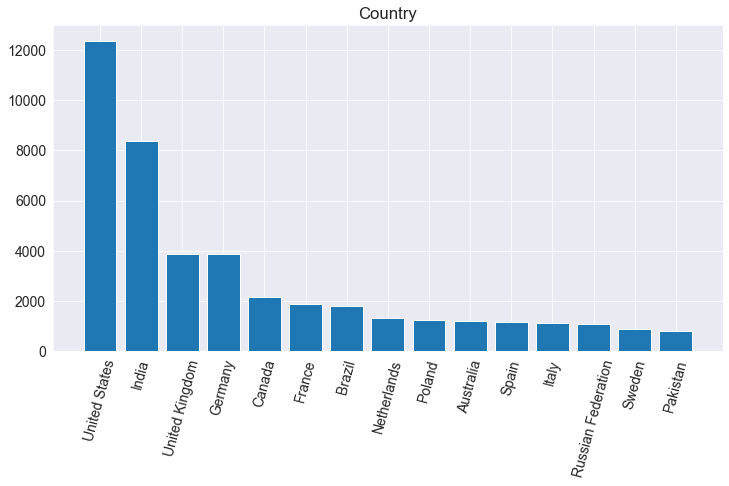

In [27]:
plt.figure(figsize = (12,6))
plt.xticks(rotation=75)
plt.title('Country')
plt.bar(top_countries.index, top_countries);

A disproportionalately high number of respondents are from USA and India - maybe because these countries have highest population among all the countries and since the survey is in english, which is the common language used by professionals in USA, India & UK.

# Age

The distribution of age of respondents is also another important factor to look at, and we can use a histogram to visualize it

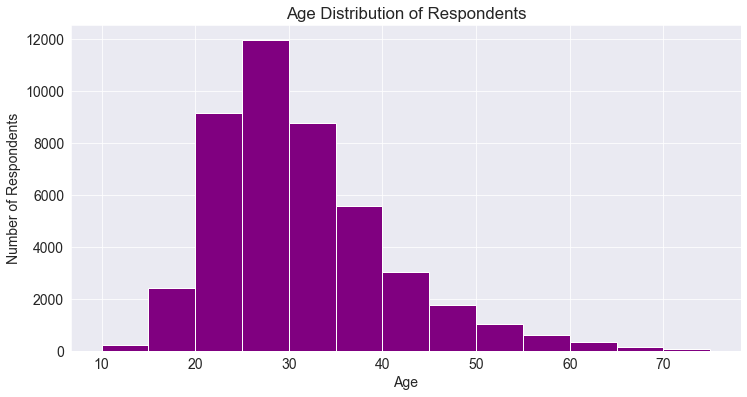

In [28]:
plt.figure(figsize=(12,6))
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

It appears that a large no. of respondents are in age range of 20-40, which is somewhat representative of  programming community .

# Gender
Let's look at the distribution of responses for gender. It's a well known fact that women and non binary genders are underrepresentated in the programming community, so we might expect to a skewed distribution here.

In [29]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

Pie Chart would be a good way to visualize the distribution.

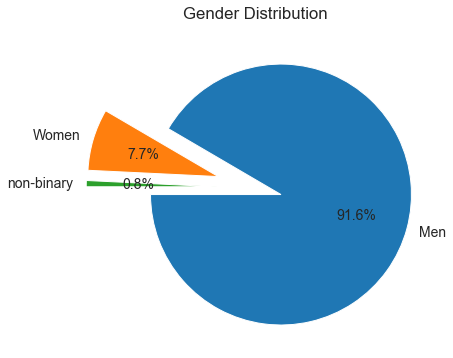

In [30]:
labels = 'Men', 'Women', 'non-binary'
explode = (0.2, 0.3, 0.3,)
plt.figure(figsize = (12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=labels, explode = explode, autopct='%1.1f%%', startangle=180);

Only 8% of survey respondents who have answered identifies as women or non-binary or prefered not to say. This number is way lower than the overall percentage of wpmen & non-binary genders in the programming community.

# Education Level

Formal education in computer sciences is often considered an important requirement of becoming a programmer. Let's see if this indeed the case, since there are many free resources and tutorials available online to learn programming.

We'll use a horizontal bar chart to compare educational levels of the respondents.

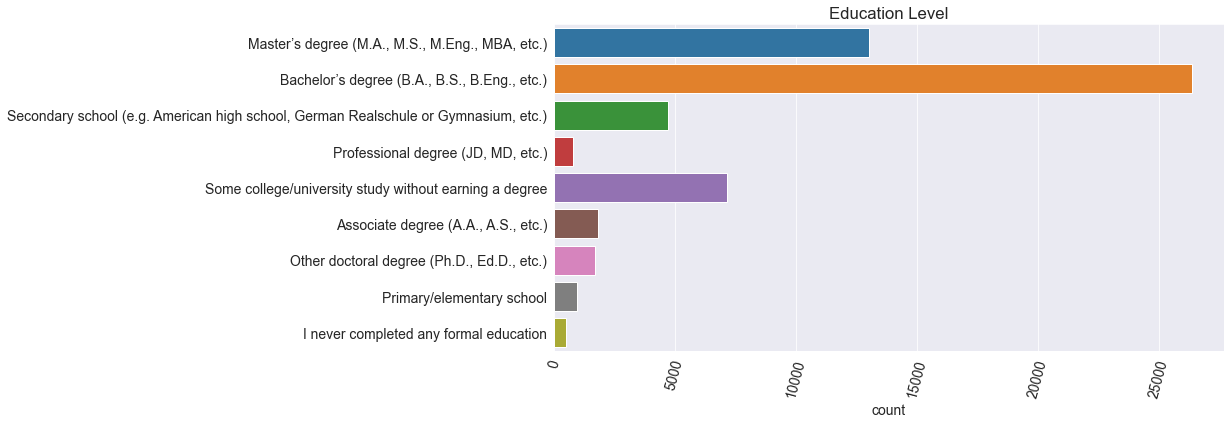

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title('Education Level')
plt.ylabel(None);

It appears that almost 25000 respondents hold bachelor's degree and over 12000 respondents have master's degree, so most programmers definitely seem to have some college education, although it is not clear from this graph if they have a degree in computer science.

# Employment

Freelancing and contract work is common among pragrammers, so it would be interesting to compare the break down between full time, part time and freelance work.

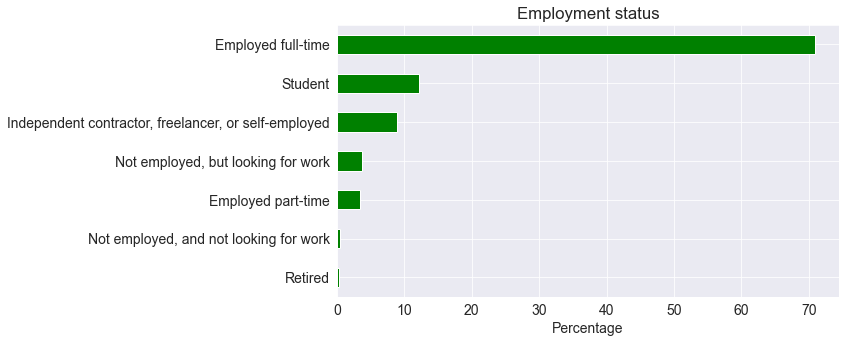

In [32]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title('Employment status')
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers.

The DevType field contains information about the roles held by respondents. since the question allows multiple answer, the column contains lists of values seprated by ';', 
which makes it a bit harder to analyze directly. 

In [33]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

Let's define a helper function which turns a column containing a list of values into a dataframe with one column for each possible option.

In [34]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value in col_series[col_series.notnull()].iteritems():
        for option in value.split(';'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]
    

In [35]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [36]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The dev_type_df has one column for each option that can be selected as a response. If a respondent has selected the option, value in the column is true, otherwise it is false.

In [37]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals                                

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

# Asking and Answering Questions

we've already gained several insights about respondents and programming community by exploring individual coumns of dataset. Let's ask some specific questions and try to answer them using data frame operations and interesting visualizations.

**Q: Which were the most popular programming languages?**

To answer this, we can use the LanguageWorkedWith column.Similar to DevType, respondents were allowed to choose multiple options here.

In [38]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

first,we'll convert this column into a dataframe containing a column for each language listed in the options.

In [39]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options.

In [40]:
language_worked_percentages = languages_worked_df.mean().sort_values(ascending=False)*100
language_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

We can plot this information using horizontal bar chart.

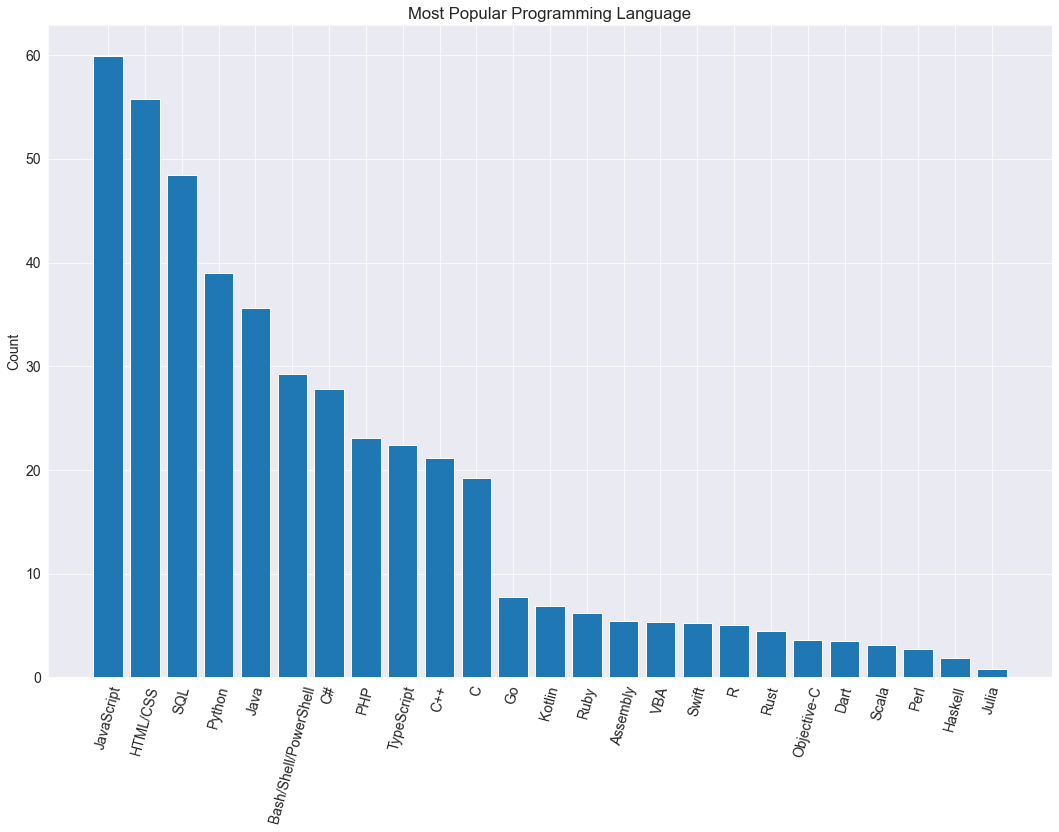

In [41]:
plt.figure(figsize=(18,12))
plt.bar(language_worked_percentages.index, language_worked_percentages)
plt.xticks(rotation=75)
plt.title("Most Popular Programming Language")
plt.ylabel('Count');

## Which languages is the most people interested to learn over next year?

for this we can use the LanguageDesireNextYear column, with similar processing as of previous one.

In [42]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False)*100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

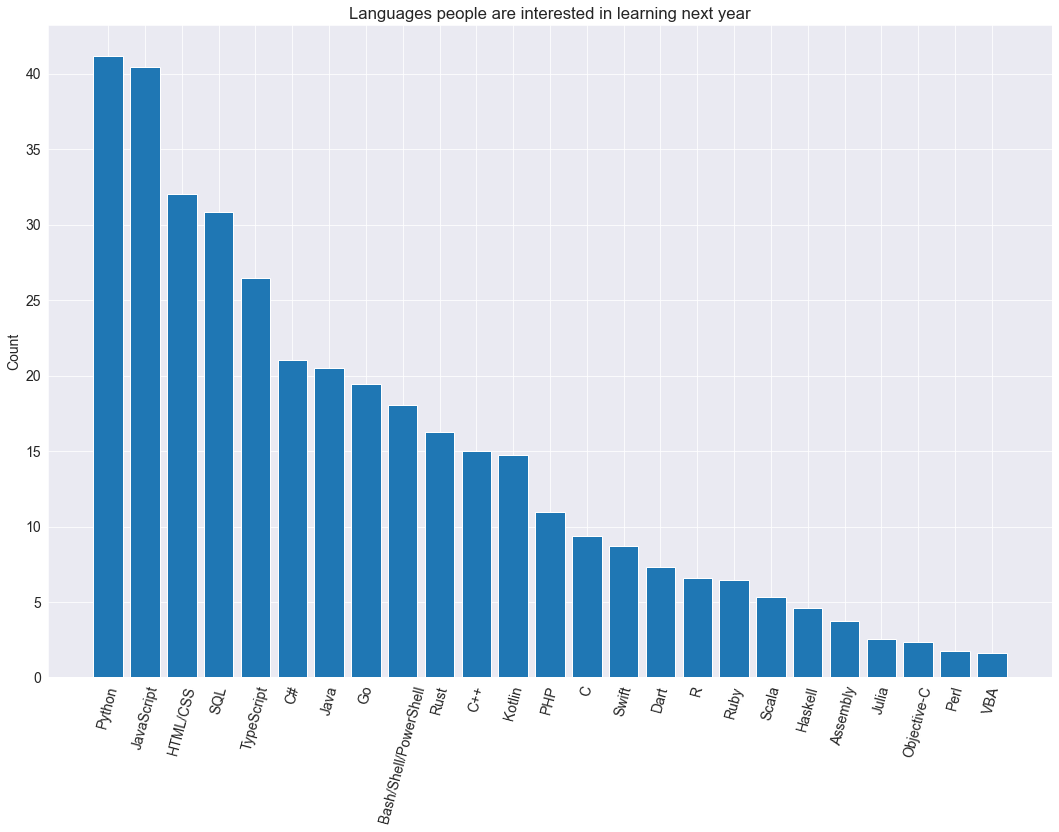

In [43]:
plt.figure(figsize=(18,12))
plt.bar(languages_interested_percentages.index, languages_interested_percentages)
plt.xticks(rotation=75)
plt.title("Languages people are interested in learning next year")
plt.ylabel('Count');

Python is the language most people are interested in learning next year because it is an easy-to-learn general purpose programming language well suited for a vaiety of domains like
application devlopment, numerical computing, data analysis, machine learning,big data, web scrapping etc.

**Q: In which countries do programmers work for highest number of hours per week? Consider countries with more than 250 responses only.**

In [44]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs' , ascending=False)

In [45]:
countries_df

,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [46]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [47]:
high_response_countries_df 

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


The asian countries like Iran, Israel, & China have the highest working hours, followed by the US. However, there isn't too much variation overaal and the average workinh hours seems to be around 40 hours a week.

**Q: How important is to start young to build a career in programming?**

Let's create a scatter plot of Age Vs. YearsCodePro(i.e., years of coding experience) to answer this question.

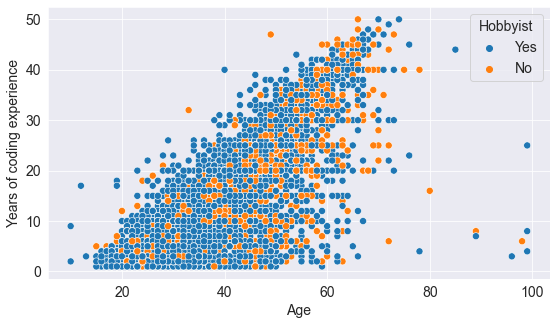

In [48]:
sns.scatterplot(data=survey_df, x = 'Age', y = 'YearsCodePro', hue = 'Hobbyist', s=50)
plt.xlabel("Age")
plt.ylabel("Years of coding experience");

we cans ee points all over the plot, which seems to indicate that **you can start programming professionally at any age.** also, amny people have been coding for several yearsas a hobby.

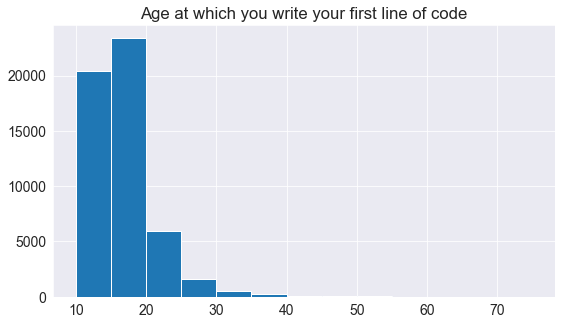

In [49]:
plt.title('Age at which you write your first line of code')
plt.hist(survey_df.Age1stCode, bins=np.arange(10,80,5));

As expected, most people seem to have started coding at the age range of 15 to 20, because of the study of computer sciences in school or college. 

# Inferences and Conclusions

**we've drawn many inferences from the survey,here's a summary of few of them:**
  
   1. Based on the demographic of survey respondents, we can infer that the survey is somewhat representative of the overall programming community, although it           definitely has fewer responses from non-english speaking countries and from women and non-binary gender.
   
   
   2. Most programmers hold a college degree either bachelor's or master's, although  large percentage of them did not have computer science as their major in           college, so a computer science degree is'nt compulsory to learn coding or start a professional career in programming.
   
   
   3. A significant percent of programmers either work part time or as a freelancer, and this can be a great way to break into the field, especially when you are 
      just getting started.
      
      
   4. Java script and HTML/CSS are the most used programming languages followed by SQL and Python.  
   
   
   5. Python is the language most people are interested in learning - since it is a easy-to-learn general purpose programming language suited for a variety of           domains.
   
   
   6. Programmers around the world seem to be working for around 40 hours per week on average, with slight variations by country.
   
   
   7. You can learn and start programming professionally at any age, and you are likely to have a long an fulfilling career if you also enjoy programming as a           hobby.